In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# PREPROCESSING DATA
Cleaning and format data


In [4]:
path_economic = ('/content/sample_data/data_month.csv')
economic_data  = pd.read_csv(path_economic)
# economic_data  = economic_data .iloc[:, :19]
economic_data  = economic_data .dropna()
economic_data.head()

,year,month,GDP_grow_rate,agriculture,industry,service,GDP_real,GDP_per_capita,CPI,FDI_in,FDI_out,inflation_rate,exchange_rate,exchange,export,import,workers,unemployment_rate,income,income_VND
1,2000.0,1.0,1.03,3.76,8.61,2.08,33973,5627000,0.4,0.55,1.09,0.048,0.17,14052,853,949,37.6,2.3,228.34,3208697.494
2,2000.0,2.0,2.2,0.8,5.11,0.56,34496,5663000,1.6,0.21,1.03,0.053,0.04,14057,894,1112,37.68,2.32,228.36,3210111.719
3,2000.0,3.0,3.9,3.33,1.24,4.08,34498,5690000,-1.1,-0.4,1.39,0.054,0.03,14061,943,1181,37.75,2.33,228.55,3213654.015
4,2000.0,4.0,4.7,3.39,5.77,1.59,34675,5735000,-0.7,0.32,0.22,0.048,0.05,14068,1125,1187,37.8,2.35,228.59,3215793.204
5,2000.0,5.0,2.1,0.69,0.26,3.17,35294,5771000,-0.6,-0.7,0.16,0.047,0.11,14084,1160,1202,37.9,2.37,229.36,3230350.004


In [5]:
economic_data ['year'] = economic_data ['year'].astype('int')
economic_data ['month'] = economic_data ['month'].astype('int')
economic_data ['GDP_grow_rate'] = economic_data ['GDP_grow_rate'].astype('float')
economic_data ['GDP_real'] = economic_data ['GDP_real'].astype('float')
economic_data ['GDP_per_capita'] = economic_data ['GDP_per_capita'].astype('float')
economic_data ['agriculture'] = economic_data ['agriculture'].astype('float')
economic_data ['industry'] = economic_data ['industry'].astype('float')
economic_data ['service'] = economic_data ['service'].astype('float')
economic_data ['CPI'] = economic_data ['CPI'].astype('float')
economic_data ['FDI_in'] = economic_data ['FDI_in'].astype('float')
economic_data ['FDI_out'] = economic_data ['FDI_out'].astype('float')
economic_data ['inflation_rate'] = economic_data ['inflation_rate'].astype('float')
economic_data ['exchange_rate'] = economic_data ['exchange_rate'].astype('float')
economic_data ['exchange'] = economic_data ['exchange'].astype('float')
economic_data ['export'] = economic_data ['export'].astype('float')
economic_data ['import'] = economic_data ['import'].astype('float')
economic_data ['workers'] = economic_data ['workers'].astype('float')
economic_data ['unemployment_rate'] = economic_data ['unemployment_rate'].astype('float')
economic_data ['income'] = economic_data['income'].astype('float')
economic_data ['income_VND'] = economic_data['income_VND'].astype('float')
economic_data['date'] = pd.to_datetime(economic_data['year'].astype(str) + '-' + economic_data['month'].astype(str), format='%Y-%m')
economic_data = economic_data.drop(['year', 'month'], axis=1)
# economic_data = economic_data.set_index('date')

economic_data

,GDP_grow_rate,agriculture,industry,service,GDP_real,GDP_per_capita,CPI,FDI_in,FDI_out,inflation_rate,exchange_rate,exchange,export,import,workers,unemployment_rate,income,income_VND,date
1,1.03,3.76,8.61,2.08,33973.0,5627000.0,0.40,0.55,1.09,0.048,0.17,14052.0,853.0,949.0,37.60,2.30,228.34,3.208697e+06,2000-01-01
2,2.20,0.80,5.11,0.56,34496.0,5663000.0,1.60,0.21,1.03,0.053,0.04,14057.0,894.0,1112.0,37.68,2.32,228.36,3.210112e+06,2000-02-01
3,3.90,3.33,1.24,4.08,34498.0,5690000.0,-1.10,-0.40,1.39,0.054,0.03,14061.0,943.0,1181.0,37.75,2.33,228.55,3.213654e+06,2000-03-01
4,4.70,3.39,5.77,1.59,34675.0,5735000.0,-0.70,0.32,0.22,0.048,0.05,14068.0,1125.0,1187.0,37.80,2.35,228.59,3.215793e+06,2000-04-01
5,2.10,0.69,0.26,3.17,35294.0,5771000.0,-0.60,-0.70,0.16,0.047,0.11,14084.0,1160.0,1202.0,37.90,2.37,229.36,3.230350e+06,2000-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1.75,2.29,-2.04,4.68,809365.0,68432000.0,0.01,1.98,1.80,0.280,0.15,23485.0,29050.0,26810.0,53.59,3.01,2476.17,5.815290e+07,2023-05-01
282,1.75,2.05,-2.95,4.40,822818.0,68544000.0,0.27,2.57,2.37,0.260,0.38,23575.0,29300.0,26710.0,53.71,3.06,2472.99,5.830066e+07,2023-06-01
283,0.15,1.82,-3.85,4.12,769274.0,68656000.0,0.45,2.81,1.56,0.330,0.45,23680.0,29680.0,27530.0,53.82,3.11,2469.80,5.848489e+07,2023-07-01
284,-1.05,1.58,-4.76,4.36,758151.0,68768000.0,0.88,1.91,1.52,0.007,1.60,24060.0,32370.0,28550.0,53.94,3.16,2466.62,5.934677e+07,2023-08-01


In [6]:
economic_data['jobs'] = economic_data['workers'] * (1 - economic_data['unemployment_rate']/100)
economic_data

,GDP_grow_rate,agriculture,industry,service,GDP_real,GDP_per_capita,CPI,FDI_in,FDI_out,inflation_rate,exchange_rate,exchange,export,import,workers,unemployment_rate,income,income_VND,date,jobs
1,1.03,3.76,8.61,2.08,33973.0,5627000.0,0.40,0.55,1.09,0.048,0.17,14052.0,853.0,949.0,37.60,2.30,228.34,3.208697e+06,2000-01-01,36.735200
2,2.20,0.80,5.11,0.56,34496.0,5663000.0,1.60,0.21,1.03,0.053,0.04,14057.0,894.0,1112.0,37.68,2.32,228.36,3.210112e+06,2000-02-01,36.805824
3,3.90,3.33,1.24,4.08,34498.0,5690000.0,-1.10,-0.40,1.39,0.054,0.03,14061.0,943.0,1181.0,37.75,2.33,228.55,3.213654e+06,2000-03-01,36.870425
4,4.70,3.39,5.77,1.59,34675.0,5735000.0,-0.70,0.32,0.22,0.048,0.05,14068.0,1125.0,1187.0,37.80,2.35,228.59,3.215793e+06,2000-04-01,36.911700
5,2.10,0.69,0.26,3.17,35294.0,5771000.0,-0.60,-0.70,0.16,0.047,0.11,14084.0,1160.0,1202.0,37.90,2.37,229.36,3.230350e+06,2000-05-01,37.001770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1.75,2.29,-2.04,4.68,809365.0,68432000.0,0.01,1.98,1.80,0.280,0.15,23485.0,29050.0,26810.0,53.59,3.01,2476.17,5.815290e+07,2023-05-01,51.976941
282,1.75,2.05,-2.95,4.40,822818.0,68544000.0,0.27,2.57,2.37,0.260,0.38,23575.0,29300.0,26710.0,53.71,3.06,2472.99,5.830066e+07,2023-06-01,52.066474
283,0.15,1.82,-3.85,4.12,769274.0,68656000.0,0.45,2.81,1.56,0.330,0.45,23680.0,29680.0,27530.0,53.82,3.11,2469.80,5.848489e+07,2023-07-01,52.146198
284,-1.05,1.58,-4.76,4.36,758151.0,68768000.0,0.88,1.91,1.52,0.007,1.60,24060.0,32370.0,28550.0,53.94,3.16,2466.62,5.934677e+07,2023-08-01,52.235496


#Plotting Heatmap, Scatter

<ipython-input-7-4e5161f715f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(economic_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")


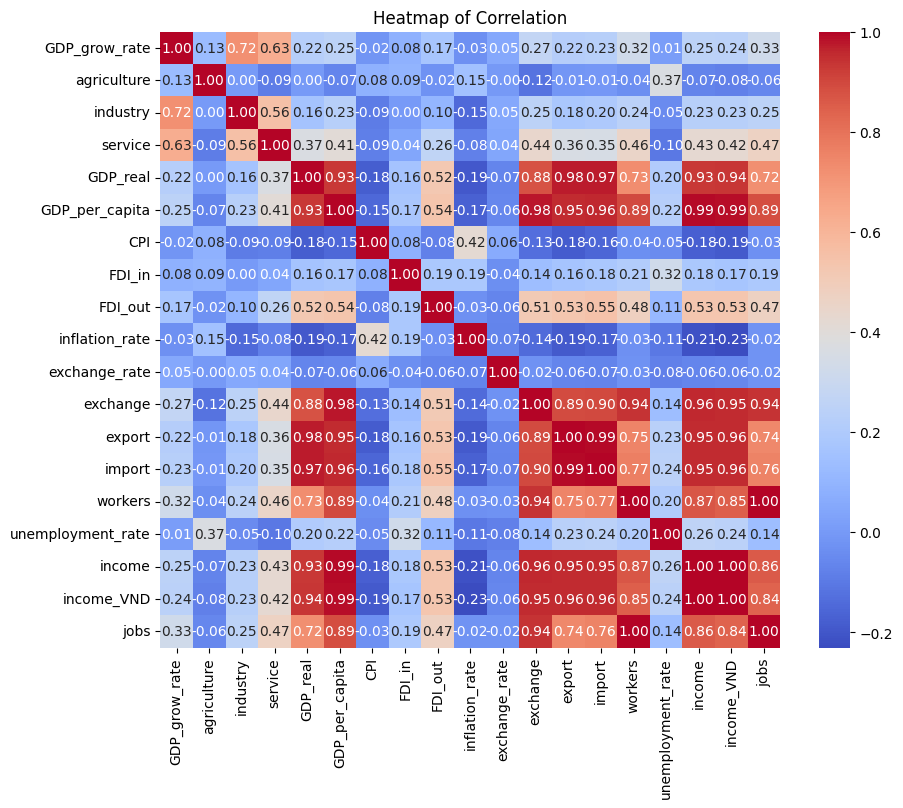

In [7]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(economic_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation")
plt.show()

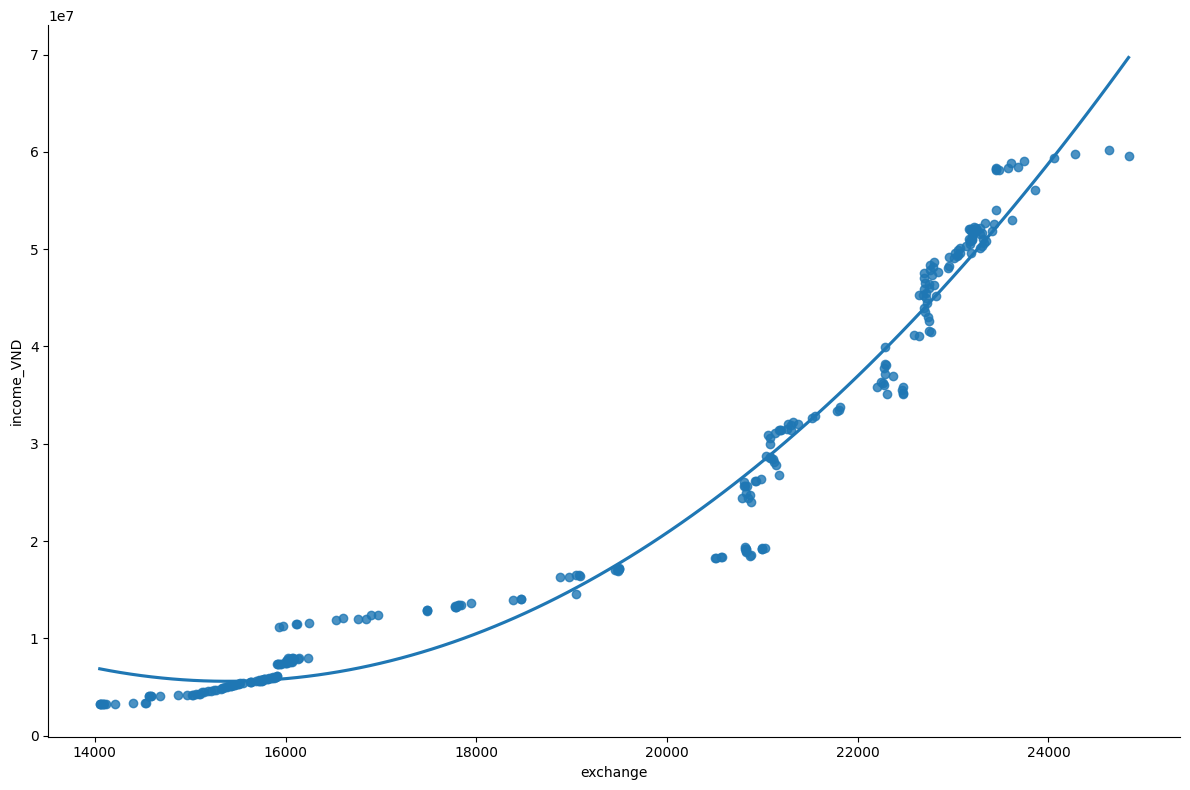

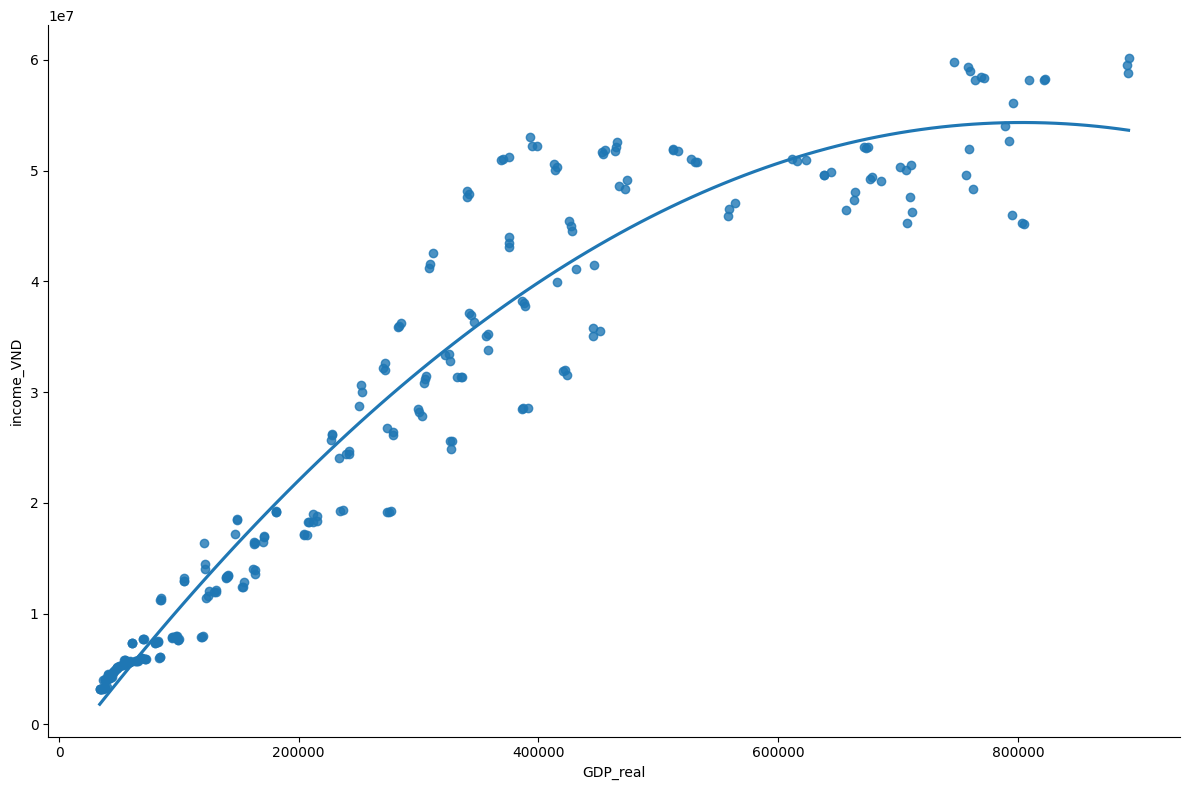

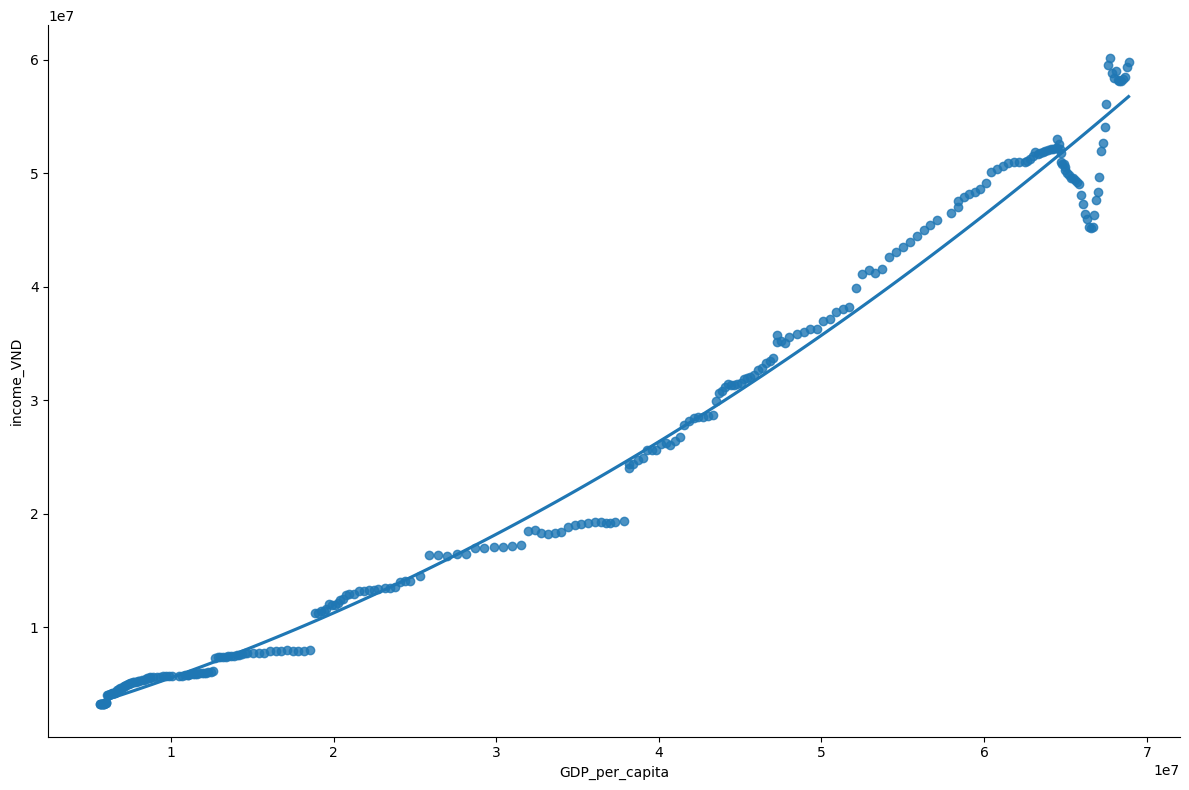

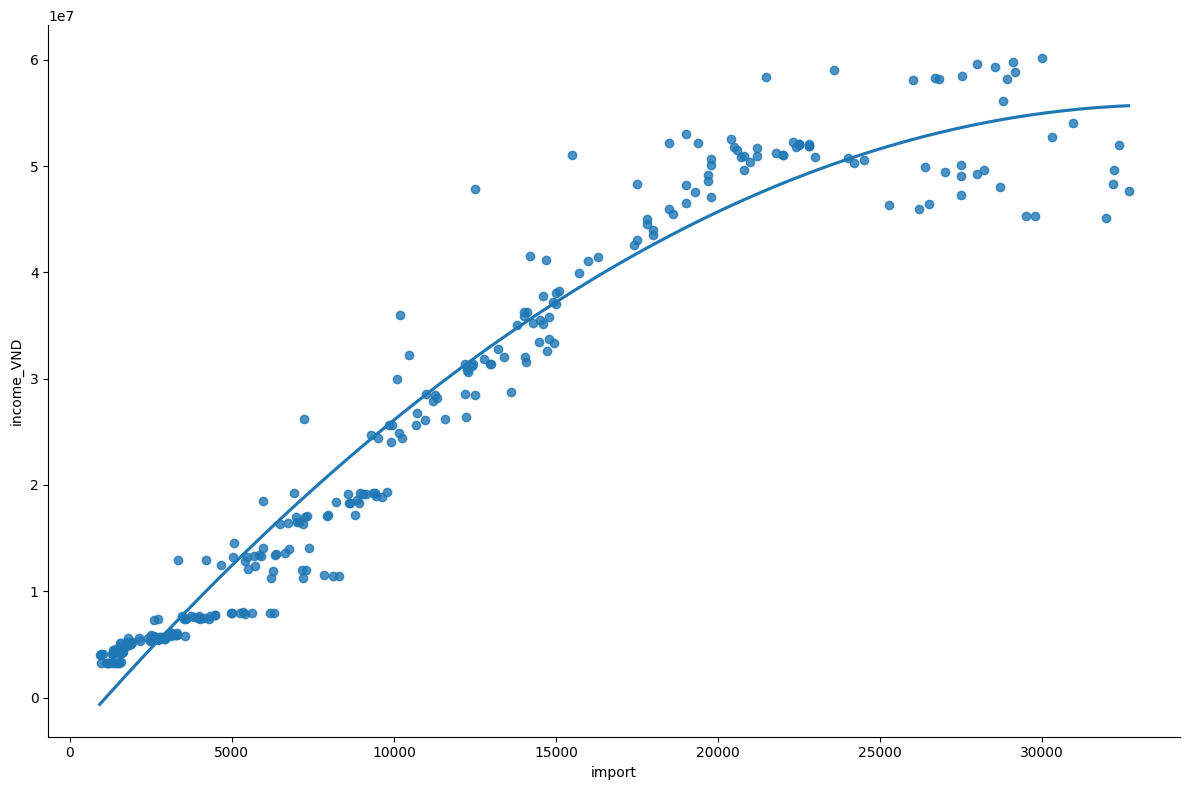

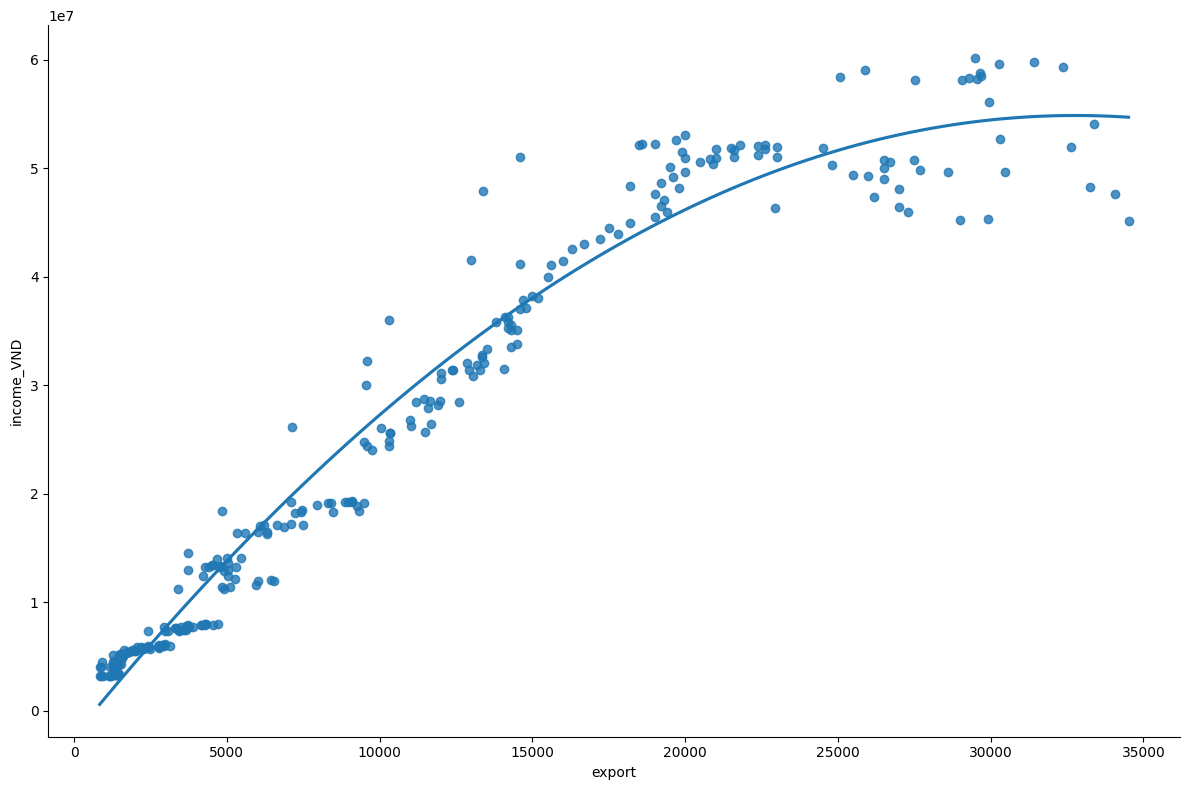

In [8]:
# plt.figure(figsize=(12, 6))
# plt.scatter(x=economic_data['GDP per capita'], y=economic_data['income'], label='Data Points')

# a, b = np.polyfit(economic_data['GDP per capita'], economic_data['income'], 1)
# plt.plot(economic_data['GDP per capita'], a*economic_data['income']+b)
# plt.text(1, 90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

# plt.xlabel('GDP per capita')
# plt.ylabel('income')
# plt.title("Scatter")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.scatter(x=economic_data['exchange'], y=economic_data['income'], label='Data Points')

# a, b = np.polyfit(economic_data['exchange'], economic_data['income'], 1)
# plt.plot(economic_data['exchange'], a*economic_data['income']+b)
# plt.text(1, 90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

# plt.xlabel('Exchange')
# plt.ylabel('income')
# plt.title("Scatter")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.scatter(x=economic_data['import'], y=economic_data['income'], label='Data Points')
# plt.xlabel('Import')
# plt.ylabel('income')
# plt.title("Scatter")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.scatter(x=economic_data['export'], y=economic_data['income'], label='Data Points')
# plt.xlabel('Export')
# plt.ylabel('income')
# plt.title("Scatter")
# plt.show()

sns.lmplot(x ='exchange', y ='income_VND', data = economic_data, order = 2, ci = None, height=8, aspect=1.5)
sns.lmplot(x ='GDP_real', y ='income_VND', data = economic_data, order = 2, ci = None, height=8, aspect=1.5)
sns.lmplot(x ='GDP_per_capita', y ='income_VND', data = economic_data, order = 2, ci = None, height=8, aspect=1.5)
sns.lmplot(x ='import', y ='income_VND', data = economic_data, order = 2, ci = None, height=8, aspect=1.5)
sns.lmplot(x ='export', y ='income_VND', data = economic_data, order = 2, ci = None, height=8, aspect=1.5)
plt.show()
# px.scatter(x=economic_data['GDP real'], y=economic_data['income'],template='seaborn')
# px.scatter(x=economic_data['exchange'], y=economic_data['income'],template='seaborn')
# px.scatter(x=economic_data['export'], y=economic_data['income'],template='seaborn')economic_data['import']
# px.scatter(x=economic_data['import'], y=economic_data['income'],template='seaborn')

#SPLITTING DATA (7-2-1)
# Split the data into training, testing, and validation sets


In [9]:
train_size = int(0.7 * len(economic_data))
test_size = int(0.2 * len(economic_data))
val_size = len(economic_data) - train_size - test_size

train_data = economic_data[:train_size]
test_data = economic_data[train_size:train_size+test_size]
val_data = economic_data[train_size+test_size:]

# LINEAR REGRESSION - Simple Linear Regression
Predicted future variables based on a time index and use that variables to predicts Income

In [10]:
x_train = np.array(train_data.index).reshape(-1, 1)

GDP_grow_train = np.array(train_data['GDP_grow_rate'])
GDP_capita_train = np.array(train_data['GDP_per_capita'])
inflation_train = np.array(train_data['inflation_rate'])
import_train = np.array(train_data['import'])
export_train = np.array(train_data['export'])
workers_train = np.array(train_data['workers'])

In [11]:
model_grow_value = LinearRegression()
model_grow_value.fit(x_train, GDP_grow_train)

model_per_value = LinearRegression()
model_per_value.fit(x_train, GDP_capita_train)

model_inflation_value = LinearRegression()
model_inflation_value.fit(x_train, inflation_train)

model_import_value = LinearRegression()
model_import_value.fit(x_train, import_train)

model_export_value = LinearRegression()
model_export_value.fit(x_train, export_train)

model_workers_value = LinearRegression()
model_workers_value.fit(x_train, workers_train)


LinearRegression()

In [12]:
x_test = np.array(test_data.index).reshape(-1, 1)
x_val= np.array(val_data.index).reshape(-1, 1)

y_pred_train_GDP_per = model_per_value.predict(x_train)

y_test_GDP_per = np.array(test_data['GDP_per_capita'])
y_pred_GDP_per = model_per_value.predict(x_test)

y_val_GDP_per = np.array(val_data['GDP_per_capita'])
y_pred_val_GDP_per = model_per_value.predict(x_val)

y_pred_train_GDP_grow = model_grow_value.predict(x_train)

y_test_GDP_grow = np.array(test_data['GDP_grow_rate'])
y_pred_GDP_grow = model_grow_value.predict(x_test)

y_val_GDP_grow = np.array(val_data['GDP_grow_rate'])
y_pred_val_GDP_grow = model_grow_value.predict(x_val)

y_pred_train_inflation = model_inflation_value.predict(x_train)

y_test_inflation = np.array(test_data['inflation_rate'])
y_pred_inflation = model_inflation_value.predict(x_test)

y_val_inflation = np.array(val_data['inflation_rate'])
y_pred_val_inflation = model_inflation_value.predict(x_val)

y_pred_train_import = model_import_value.predict(x_train)

y_test_import = np.array(test_data['import'])
y_pred_import = model_import_value.predict(x_test)

y_val_import = np.array(val_data['import'])
y_pred_val_import = model_import_value.predict(x_val)

y_pred_train_export = model_export_value.predict(x_train)

y_test_export = np.array(test_data['export'])
y_pred_export = model_export_value.predict(x_test)

y_val_export = np.array(val_data['export'])
y_pred_val_export = model_export_value.predict(x_val)

y_test_workers = np.array(test_data['workers'])
y_pred_workers = model_workers_value.predict(x_test)

y_val_workers = np.array(val_data['workers'])
y_pred_val_workers = model_workers_value.predict(x_val)

In [13]:
last_index =  economic_data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_5_years = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

GDP_grow_rate_next_5_years = model_grow_value.predict(x_next_5_years)
GDP_per_capita_next_5_years = model_per_value.predict(x_next_5_years)
inflation_next_5_years = model_inflation_value.predict(x_next_5_years)
import_next_5_years = model_import_value.predict(x_next_5_years)
export_next_5_years = model_export_value.predict(x_next_5_years)
workers_next_5_years = model_workers_value.predict(x_next_5_years)

data = {
    'GDP_grow_rate': GDP_grow_rate_next_5_years,
    'GDP_per_capita': GDP_per_capita_next_5_years,
    'inflation_rate': inflation_next_5_years,
    'import': import_next_5_years,
    'export': export_next_5_years,
    'workers': workers_next_5_years,
}

independent_variables_next_5_years = pd.DataFrame(data)

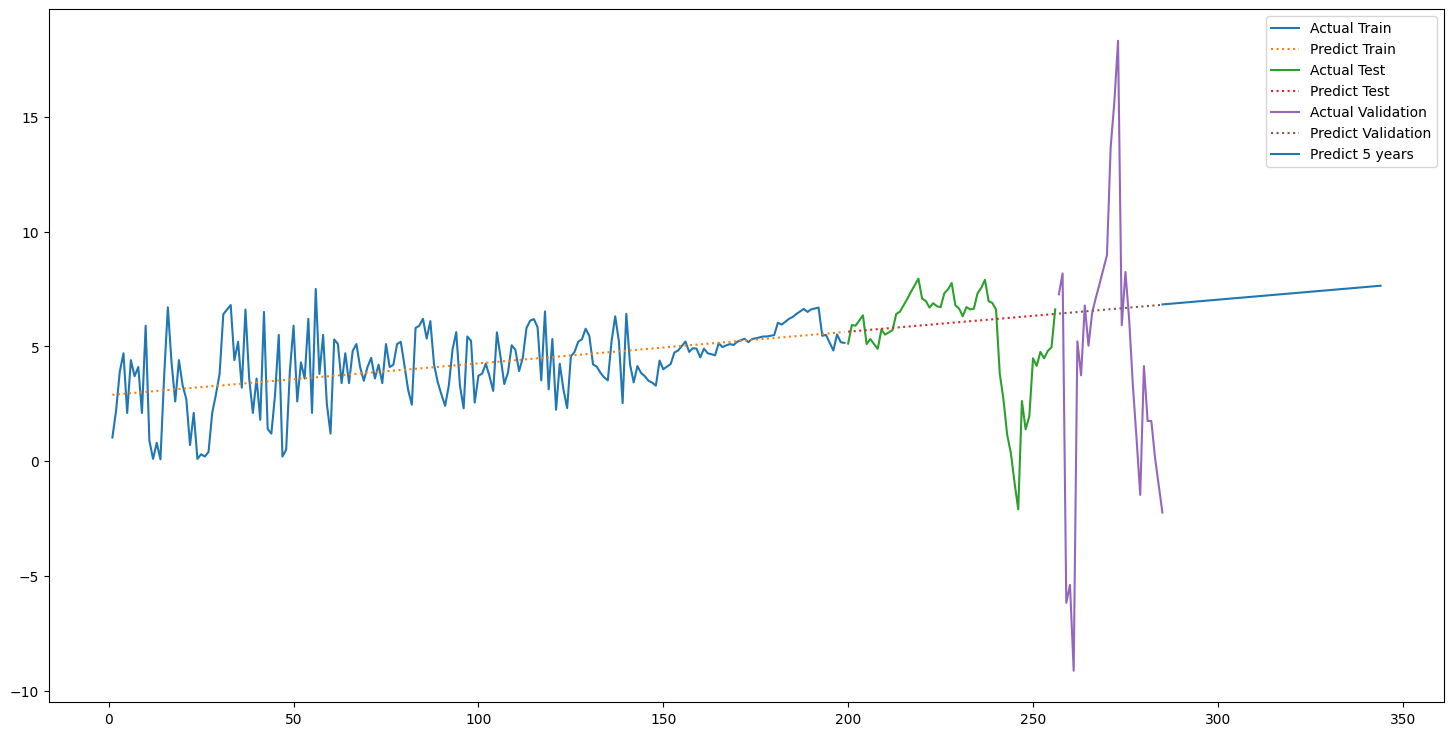

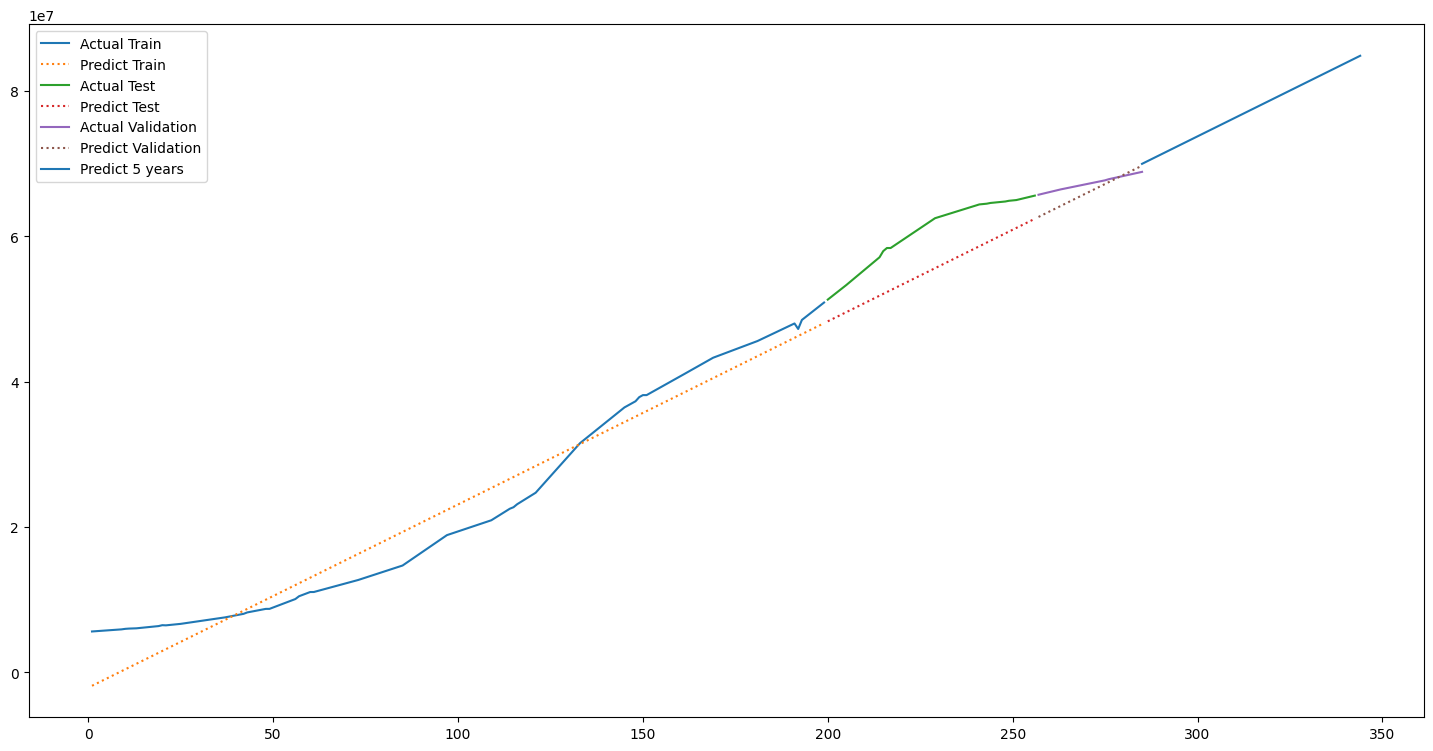

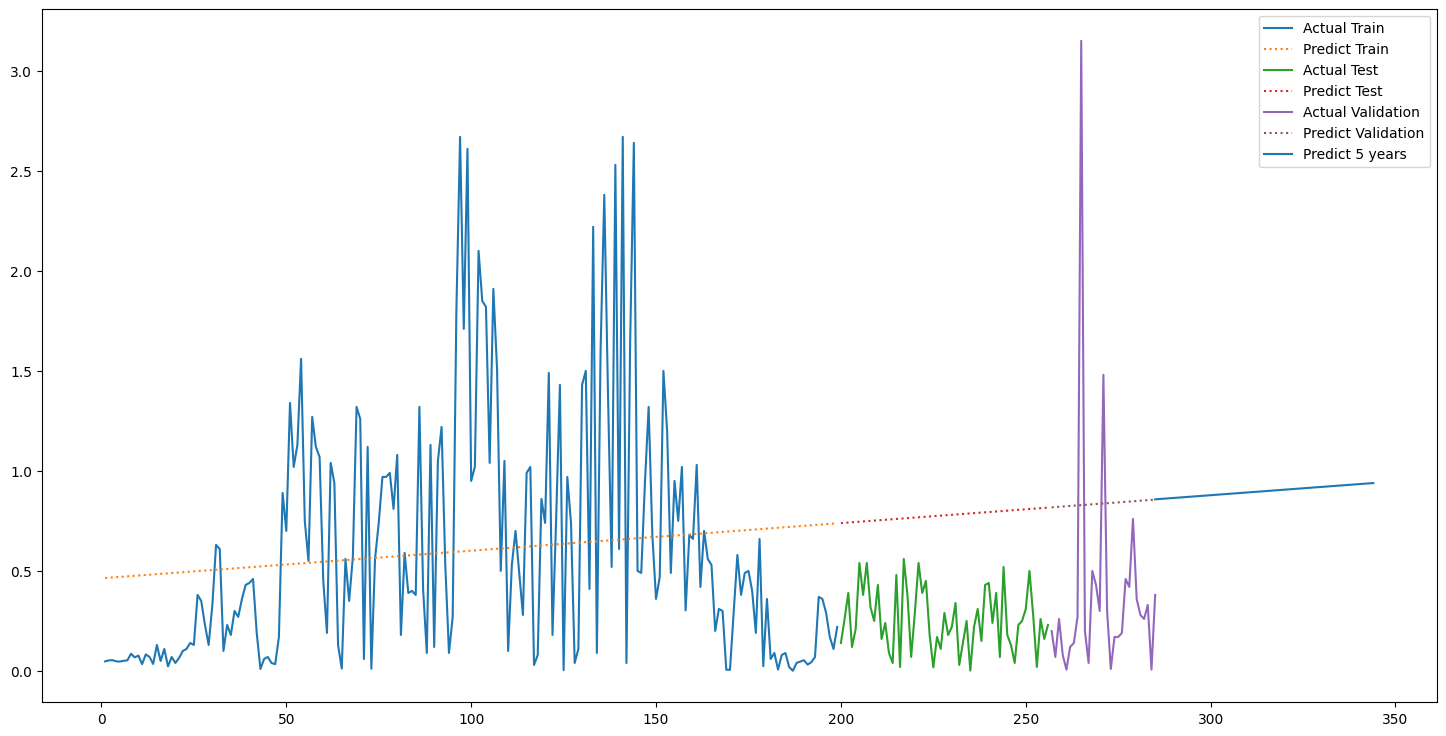

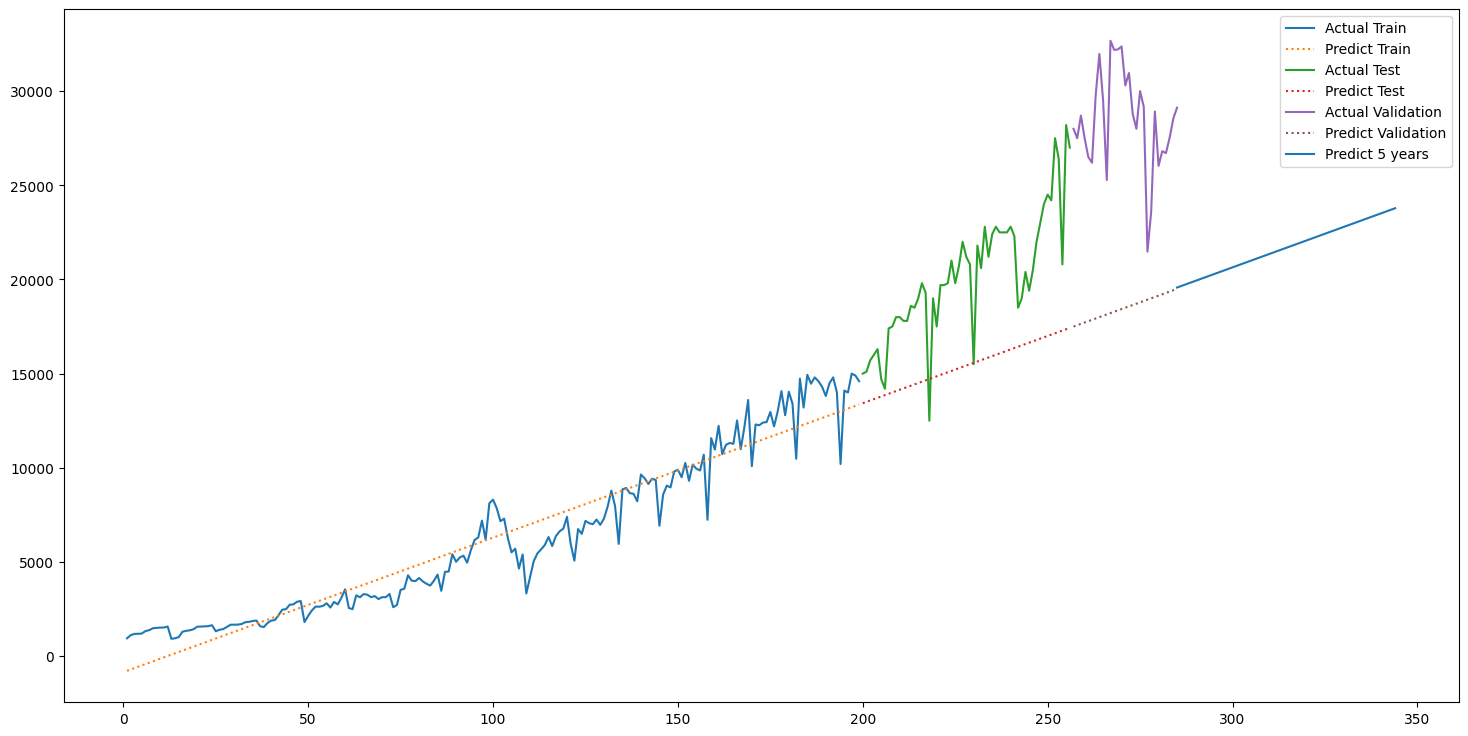

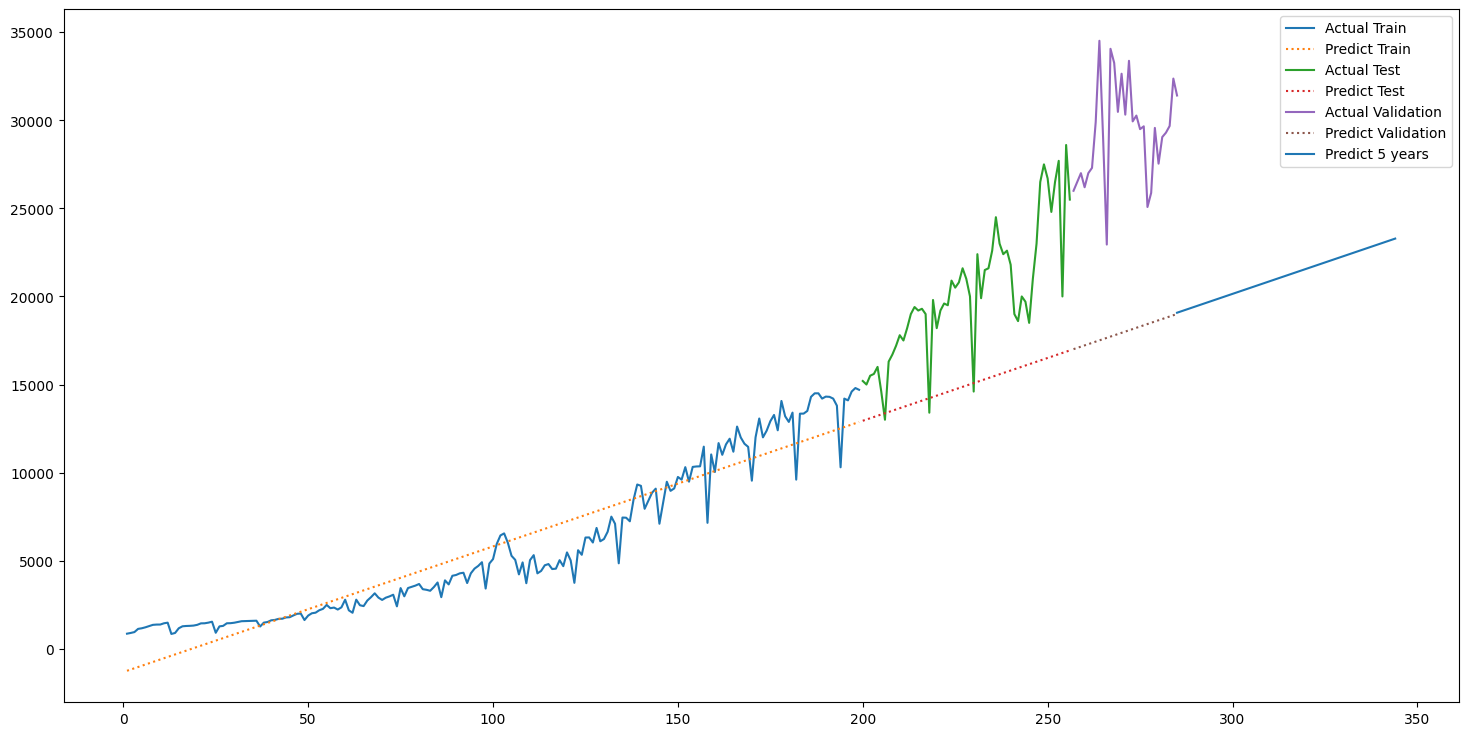

In [14]:
# Plot
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

#GDP grow rate
plt.figure(figsize=(18, 9))

plt.plot(train_data.index, train_data['GDP_grow_rate'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train_GDP_grow, label="Predict Train", linestyle="dotted", color = color_palette[1])

plt.plot(test_data.index, test_data['GDP_grow_rate'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_GDP_grow, label="Predict Test", linestyle="dotted", color=color_palette[3])

plt.plot(val_data.index, val_data['GDP_grow_rate'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val_GDP_grow, label="Predict Validation", linestyle="dotted",color=color_palette[5])

plt.plot(last_data, GDP_grow_rate_next_5_years, label="Predict 5 years")
plt.legend()


#GDP per capita
plt.figure(figsize=(18, 9))

plt.plot(train_data.index, train_data['GDP_per_capita'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train_GDP_per, label="Predict Train", linestyle="dotted", color = color_palette[1])

plt.plot(test_data.index, test_data['GDP_per_capita'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_GDP_per, label="Predict Test", linestyle="dotted", color=color_palette[3])

plt.plot(val_data.index, val_data['GDP_per_capita'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val_GDP_per, label="Predict Validation", linestyle="dotted",color=color_palette[5])

plt.plot(last_data, GDP_per_capita_next_5_years, label="Predict 5 years")
plt.legend()

#Inflation
plt.figure(figsize=(18, 9))

plt.plot(train_data.index, train_data['inflation_rate'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train_inflation, label="Predict Train", linestyle="dotted", color = color_palette[1])

plt.plot(test_data.index, test_data['inflation_rate'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_inflation, label="Predict Test", linestyle="dotted", color=color_palette[3])

plt.plot(val_data.index, val_data['inflation_rate'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val_inflation, label="Predict Validation", linestyle="dotted",color=color_palette[5])

plt.plot(last_data, inflation_next_5_years, label="Predict 5 years")
plt.legend()

#Import
plt.figure(figsize=(18, 9))
plt.plot(train_data.index, train_data['import'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train_import, label="Predict Train", linestyle="dotted", color = color_palette[1])

plt.plot(test_data.index, test_data['import'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_import, label="Predict Test", linestyle="dotted", color=color_palette[3])

plt.plot(val_data.index, val_data['import'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val_import, label="Predict Validation", linestyle="dotted",color=color_palette[5])

plt.plot(last_data, import_next_5_years, label="Predict 5 years")
plt.legend()

#Export
plt.figure(figsize=(18, 9))
plt.plot(train_data.index, train_data['export'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train_export, label="Predict Train", linestyle="dotted", color = color_palette[1])

plt.plot(test_data.index, test_data['export'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_export, label="Predict Test", linestyle="dotted", color=color_palette[3])

plt.plot(val_data.index, val_data['export'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val_export, label="Predict Validation", linestyle="dotted",color=color_palette[5])

plt.plot(last_data, export_next_5_years, label="Predict 5 years")
plt.legend()

In [ ]:
# Tính toán MSE và MAE cho mô hình GDP grow rate
mse_test_GDP_grow = mean_squared_error(y_test_GDP_grow, y_pred_GDP_grow)
mse_val_GDP_grow = mean_squared_error(y_val_GDP_grow, y_pred_val_GDP_grow)

mae_test_GDP_grow = mean_absolute_error(y_test_GDP_grow, y_pred_GDP_grow)
mae_val_GDP_grow = mean_absolute_error(y_val_GDP_grow, y_pred_val_GDP_grow)

# Tính toán MSE và MAE cho mô hình GDP per capita
mse_test_GDP_per = mean_squared_error(y_test_GDP_per, y_pred_GDP_per)
mse_val_GDP_per = mean_squared_error(y_val_GDP_per, y_pred_val_GDP_per)

mae_test_GDP_per = mean_absolute_error(y_test_GDP_per, y_pred_GDP_per)
mae_val_GDP_per = mean_absolute_error(y_val_GDP_per, y_pred_val_GDP_per)

# Tính toán MSE và MAE cho mô hình inflation
mse_test_inflation = mean_squared_error(y_test_inflation, y_pred_inflation)
mse_val_inflation = mean_squared_error(y_val_inflation, y_pred_val_inflation)

mae_test_inflation = mean_absolute_error(y_test_inflation, y_pred_inflation)
mae_val_inflation = mean_absolute_error(y_val_inflation, y_pred_val_inflation)

# Tính toán MSE và MAE cho mô hình import
mse_test_import = mean_squared_error(y_test_import, y_pred_import)
mse_val_import = mean_squared_error(y_val_import, y_pred_val_import)

mae_test_import = mean_absolute_error(y_test_import, y_pred_import)
mae_val_import = mean_absolute_error(y_val_import, y_pred_val_import)

# Tính toán MSE và MAE cho mô hình export
mse_test_export = mean_squared_error(y_test_export, y_pred_export)
mse_val_export = mean_squared_error(y_val_export, y_pred_val_export)

mae_test_export = mean_absolute_error(y_test_export, y_pred_export)
mae_val_export = mean_absolute_error(y_val_export, y_pred_val_export)

# In ra tất cả các giá trị MSE và MAE
print('Mô hình GDP_grow:')
print('Testing MSE:', mse_test_GDP_grow)
print('Validation MSE:', mse_val_GDP_grow)
print('Testing MAE:', mae_test_GDP_grow)
print('Validation MAE:', mae_val_GDP_grow)
print('\n')

print('Mô hình GDP_per_capita:')
print('Testing MSE:', mse_test_GDP_per)
print('Validation MSE:', mse_val_GDP_per)
print('Testing MAE:', mae_test_GDP_per)
print('Validation MAE:', mae_val_GDP_per)
print('\n')

print('Mô hình Inflation:')
print('Testing MSE:', mse_test_inflation)
print('Validation MSE:', mse_val_inflation)
print('Testing MAE:', mae_test_inflation)
print('Validation MAE:', mae_val_inflation)
print('\n')

print('Mô hình Import:')
print('Testing MSE:', mse_test_import)
print('Validation MSE:', mse_val_import)
print('Testing MAE:', mae_test_import)
print('Validation MAE:', mae_val_import)
print('\n')

print('Mô hình Export:')
print('Testing MSE:', mse_test_export)
print('Validation MSE:', mse_val_export)
print('Testing MAE:', mae_test_export)
print('Validation MAE:', mae_val_export)
print('\n')

Mô hình GDP_grow:
Testing MSE: 5.492799634690258
Validation MSE: 41.233340978212105
Testing MAE: 1.5705046390912565
Validation MAE: 4.772694232394995


Mô hình GDP_per_capita:
Testing MSE: 28290104986065.367
Validation MSE: 2632335277135.098
Testing MAE: 5182686.958556742
Validation MAE: 1321031.3216553002


Mô hình Inflation:
Testing MSE: 0.29808960989781635
Validation MSE: 0.5491660008819054
Testing MAE: 0.5220968671106728
Validation MAE: 0.6504529000803387


Mô hình Import:
Testing MSE: 28104056.10433518
Validation MSE: 107596564.35251765
Testing MAE: 4782.158498499944
Validation MAE: 9995.13255730061


Mô hình Export:
Testing MSE: 35135775.86796036
Validation MSE: 135020664.094769
Testing MAE: 5286.5547822044855
Validation MAE: 11295.875381925303




# LINEAR REGRESSION - Single Linear Regression
Predicted income in next 5 years based on a GDP_per_capita

In [ ]:
x_train = train_data[['GDP_per_capita']]
y_train = train_data['income_VND']

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_train = train_data[['GDP_per_capita']]
y_train = train_data['income_VND']
y_pred_train = model.predict(x_train)

x_test = test_data[['GDP_per_capita']]
y_test = test_data['income_VND']
y_pred_test = model.predict(x_test)

x_val = val_data[['GDP_per_capita']]
y_val = val_data['income_VND']
y_pred_val = model.predict(x_val)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_val = mean_squared_error(y_val, y_pred_val)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_val = mean_absolute_error(y_val, y_pred_val)

print('Mô hình:')
print('Testing MSE:', mse_test)
print('Validation MSE:', mse_val)
print('Testing MAE:', mae_test)
print('Validation MAE:', mae_val)

Mô hình:
Testing MSE: 59303099905291.36
Validation MSE: 78430059932444.97
Testing MAE: 7548594.563913613
Validation MAE: 7309792.336958192


In [ ]:
x_next_5_years = GDP_per_capita_next_5_years.reshape(-1,1)
y_next_5_years = model.predict(x_next_5_years)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


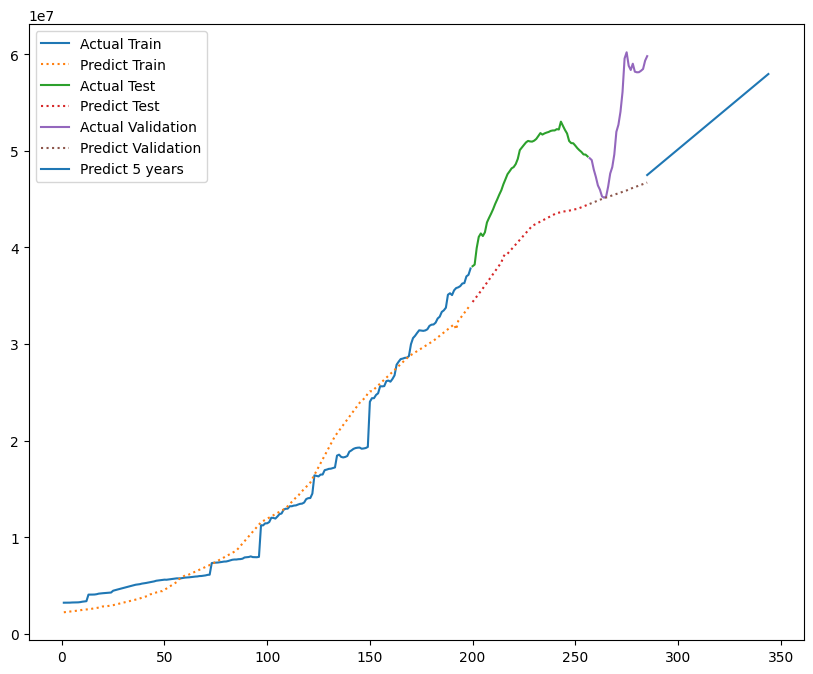

In [ ]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 8))

# train
plt.plot(train_data.index, train_data['income_VND'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train, label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
plt.plot(test_data.index, test_data['income_VND'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_test, label="Predict Test", linestyle="dotted", color=color_palette[3])

# val
plt.plot(val_data.index, val_data['income_VND'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val, label="Predict Validation", linestyle="dotted",color=color_palette[5])

# predict
plt.plot(last_data, y_next_5_years, label="Predict 5 years")

plt.legend()

In [ ]:
X = sm.add_constant(economic_data[['GDP_per_capita']])
model_stat = sm.OLS(economic_data['income_VND'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             income_VND   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          9.50e-227
Time:                        09:44:11   Log-Likelihood:                -4655.7
No. Observations:                 285   AIC:                             9315.
Df Residuals:                     283   BIC:                             9323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.005e+06   3.34e+05    -11.

# LINEAR REGRESSION - Multiple Linear Regression
Predicted income in next 5 years based on a all indepedent_variables


In [ ]:
independent_variables = train_data[['GDP_grow_rate', 'GDP_per_capita', 'inflation_rate', 'import', 'export', 'workers']]

dependent_variable = train_data['income_VND']

In [ ]:
model = LinearRegression()
model.fit(independent_variables, dependent_variable)

In [ ]:
x_train = train_data[['GDP_grow_rate', 'GDP_per_capita', 'inflation_rate', 'import', 'export', 'workers']]
y_train = train_data['income_VND']
y_pred_train = model.predict(x_train)

x_test = test_data[['GDP_grow_rate', 'GDP_per_capita', 'inflation_rate', 'import', 'export', 'workers']]
y_test = test_data['income_VND']
y_pred_test = model.predict(x_test)

x_val = val_data[['GDP_grow_rate', 'GDP_per_capita', 'inflation_rate', 'import', 'export', 'workers']]
y_val = val_data['income_VND']
y_pred_val = model.predict(x_val)

In [ ]:
dependent_variable_next_5_years = model.predict(independent_variables_next_5_years)

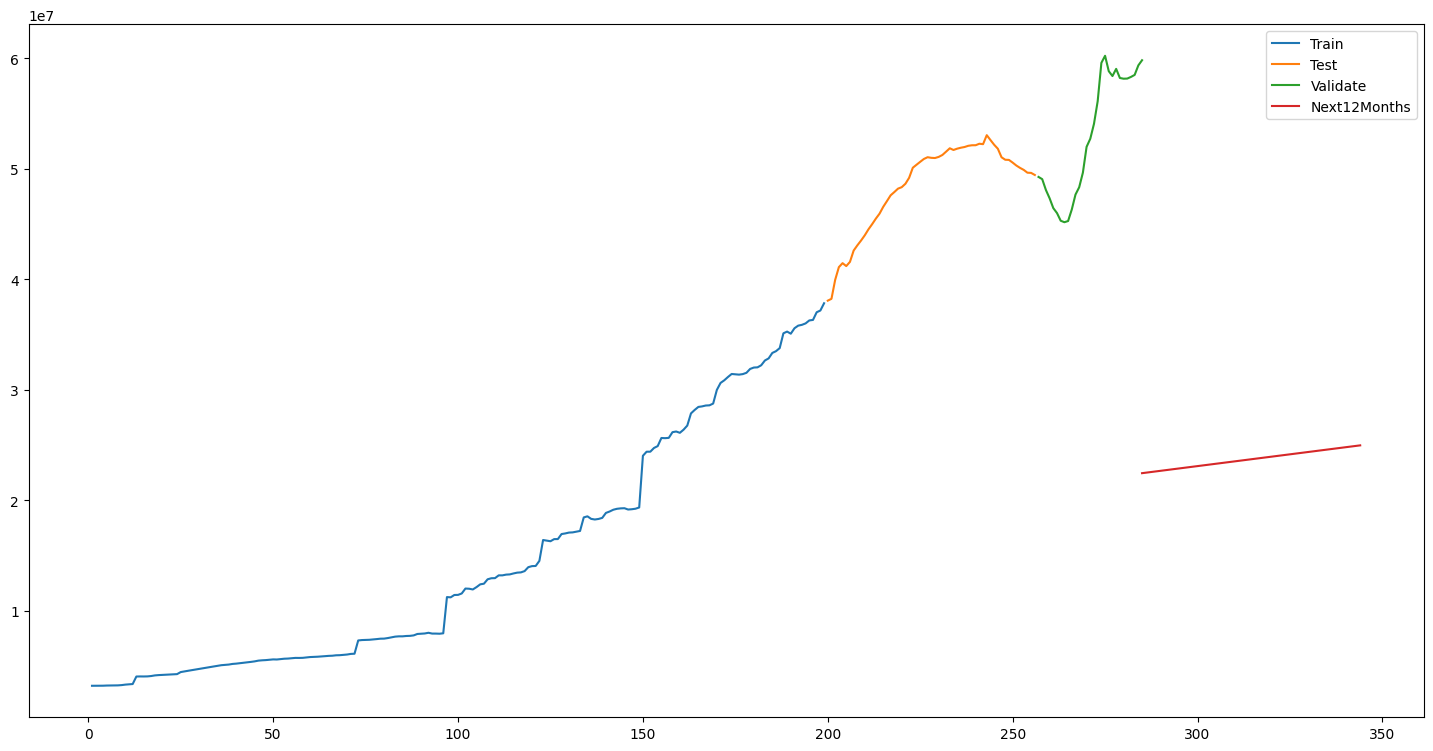

In [ ]:
# Plot
plt.figure(figsize=(18, 9))
plt.plot(train_data.index, train_data['income_VND'])
plt.plot(test_data.index, test_data['income_VND'])
plt.plot(val_data.index,val_data['income_VND'])
plt.plot(last_data, dependent_variable_next_5_years)
plt.legend(['Train', 'Test', 'Validate','Next12Months'])
plt.show()

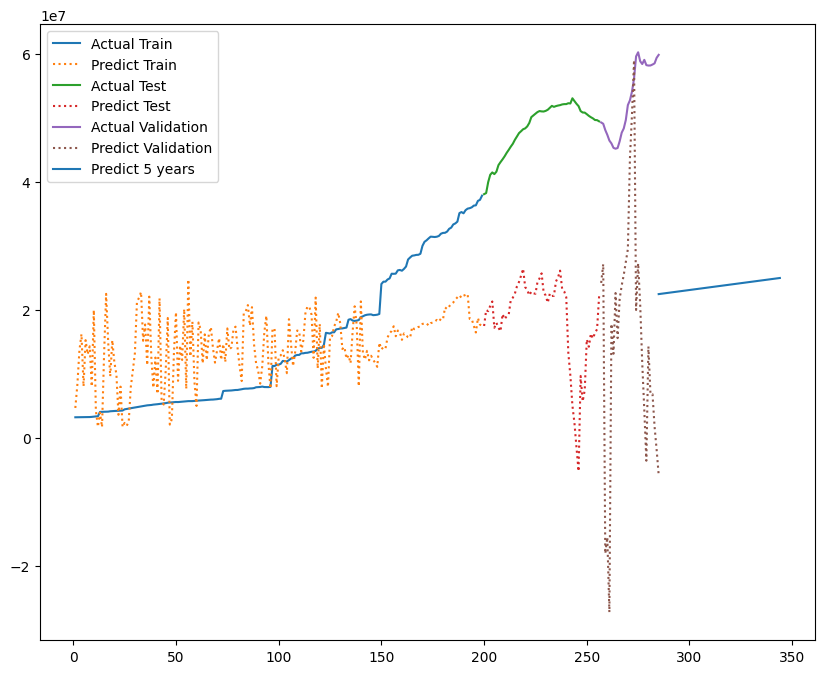

In [ ]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 8))

# train
plt.plot(train_data.index, train_data['income_VND'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train, label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
plt.plot(test_data.index, test_data['income_VND'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_test, label="Predict Test", linestyle="dotted", color=color_palette[3])

# val
plt.plot(val_data.index, val_data['income_VND'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val, label="Predict Validation", linestyle="dotted",color=color_palette[5])

# predict
plt.plot(last_data, dependent_variable_next_5_years, label="Predict 5 years")

plt.legend()

In [ ]:
X = sm.add_constant(economic_data[['GDP_grow_rate', 'GDP_per_capita', 'inflation_rate', 'import', 'export', 'workers']])
model_stat = sm.OLS(economic_data['income_VND'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             income_VND   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2674.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.31e-242
Time:                        09:46:56   Log-Likelihood:                -4596.4
No. Observations:                 285   AIC:                             9207.
Df Residuals:                     278   BIC:                             9232.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.988e+07   3.64e+06      5.

# LINEAR REGRESSION - Multiple Linear Regression multicollinearity
The forecast imcome for the next 5 years is based on all independent variables but avoids multicollinearity


In [ ]:
independent_variables = train_data[['GDP_grow_rate','inflation_rate']]

dependent_variable = train_data['income_VND']

In [ ]:
model = LinearRegression()
model.fit(independent_variables, dependent_variable)

In [ ]:
x_train = train_data[['GDP_grow_rate','inflation_rate']]
y_train = train_data['income_VND']
y_pred_train = model.predict(x_train)

x_test = test_data[['GDP_grow_rate','inflation_rate']]
y_test = test_data['income_VND']
y_pred_test = model.predict(x_test)

x_val = val_data[['GDP_grow_rate','inflation_rate']]
y_val = val_data['income_VND']
y_pred_val = model.predict(x_val)

In [ ]:
independent_variables_next_5_years = independent_variables_next_5_years.drop(['GDP_per_capita', 'import', 'export','workers'], axis=1)
dependent_variable_next_5_years = model.predict(independent_variables_next_5_years)

In [ ]:
# Plot
plt.figure(figsize=(18, 9))
plt.plot(train_data.index, train_data['income_VND'])
plt.plot(test_data.index, test_data['income_VND'])
plt.plot(val_data.index,val_data['income_VND'])
plt.plot(last_data, dependent_variable_next_5_years)
plt.legend(['Train', 'Test', 'Validate','Next12Months'])
plt.show()

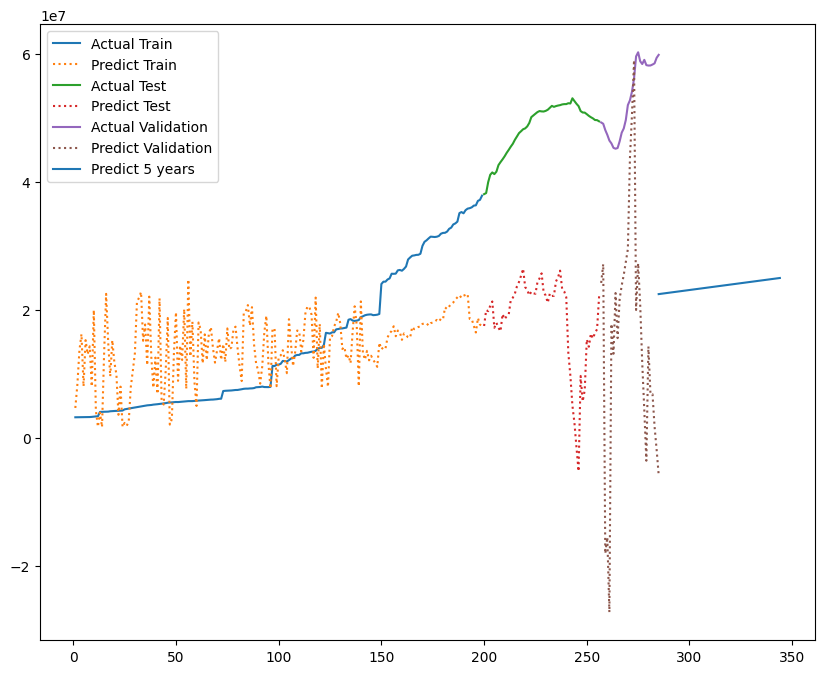

In [ ]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 8))

# train
plt.plot(train_data.index, train_data['income_VND'], label="Actual Train", color = color_palette[0])
plt.plot(train_data.index, y_pred_train, label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
plt.plot(test_data.index, test_data['income_VND'], label="Actual Test", color=color_palette[2])
plt.plot(test_data.index, y_pred_test, label="Predict Test", linestyle="dotted", color=color_palette[3])

# val
plt.plot(val_data.index, val_data['income_VND'], label="Actual Validation", color=color_palette[4])
plt.plot(val_data.index, y_pred_val, label="Predict Validation", linestyle="dotted",color=color_palette[5])

# predict
plt.plot(last_data, dependent_variable_next_5_years, label="Predict 5 years")

plt.legend()

In [ ]:
X = sm.add_constant(economic_data[['GDP_grow_rate', 'inflation_rate']])
model_stat = sm.OLS(economic_data['income_VND'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             income_VND   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     17.08
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           9.98e-08
Time:                        10:13:45   Log-Likelihood:                -5160.5
No. Observations:                 285   AIC:                         1.033e+04
Df Residuals:                     282   BIC:                         1.034e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.127e+07   2.35e+06      9.